In [ ]:
"we import (=clone) all the data or just update (=pull) them"

import os

if not os.path.exists("assets_signal"):
    print("the directory assets_signal is create")
    !git clone https://github.com/vincentvigon/assets_signal
else:
    print("the directory assets_signal is updated")
    %cd assets_signal
    !git pull https://github.com/vincentvigon/assets_signal
    %cd ..

### Import

In [ ]:
%reset -f

In [ ]:
import numpy as np
np.set_printoptions(linewidth=5000,suppress=True,precision=5)

import scipy
import scipy.signal
import scipy.fftpack

import  matplotlib.pyplot as plt
plt.style.use("default")

import imageio
import IPython
import json


In [ ]:
!pip install PyWavelets

In [ ]:
import pywt
import pywt.data

## Wavelets


Wavelet are orthonogonal basis but with a local support. They are construct by recursive scaling, which allows to make some "fast transformation", as fast as the FFT.  The advantage of wavelet, is that it naturally perform a frequence-time (or frequence-space) decomposition (as we see with the spectrogram). The standard JPEG200 is based on wavelets.

The father of the wavelet theory is Yves Meyer, whose get the Abel  prize in 2017. This is the most prestigious prise in mathematics (with the field medal).


We present in detail only the Haar-wavelets, but we will also meet other types in the programs.

### Theory


* Haar-wavelets of level 1:   We suppose that $N$ is even (to simplify). The first half of the basis is composed by:
$$
 \frac 1 {\sqrt 2}  1_{\{n,n+1\}} \qquad \text{ pour }  n=0,2,4,...,N-2
$$  
 The second half:
$$
\frac 1 {\sqrt 2} ( 1_{\{n\}}-1_{\{n+1\}}   ) \qquad \text{ pour }  n=0,2,4,...
$$

* Haar-wavelets of level 2:   We suppose that $N$ is a multiple of 4 (to simplify).  The first quarter of the basis is composed by:
$$
 \frac 1 {2}  1_{\{n,n+1,n+2,n+3\}}   \qquad \text{ pour }  n=0,4,8,...,N-4
$$  
Le second quarter:
$$
\frac 1 {2} ( 1_{\{n,n+1\}}-1_{\{n+2,n+3\}}   ) \qquad \text{ pour }  n=0,4,8,...,N-4
$$
the other elements are:
$$
\frac 1 {\sqrt 2}   ( 1_{\{n\}}-1_{\{n+1\}}   )\qquad \text{ pour }  n=0,2,4,...,N-1
$$


***To you:***

* $(2\heartsuit)$ check the orthonormality of the Haar-wavelets of level 1
* $(2\heartsuit\flat)$ check the orthonormality of the Haar-wavelets of level 2



Generaly speaking, a wavelet family is an orthonormal family which elements have supports localised at some 'scale'.

* For the Haar-wavelets of level 2: there are elements with support of size 4 or 2.

* For the Haar-wavelets of level 3: there are elements with support of size 8 or 4 or 2.

So the coordinates in a wavelet basis allow to describe signal at different scales. One speak of multi-scale analysis.

* To smooth or compress a signal, one suppress the small-scale-wavelets (=the high frequency ones).
* Conversly, to detect details (like edges), one suppress the large-scale-wavelets (=the low frequency ones).


Wavelet can also be very practical to load an image via internet:

* The site send you firstly the wide-scale-coefficient: recombining the image, we display a blured version.
* Then the site send the small-scale coefficients: adding the correponding waves to the blured version, allow to display the image in its full resolution.

***To you:*** $(1\heartsuit)$ Does this progressive loading is possible with the classical JPEG?




### Plot some basis elements

In [ ]:
import pywt
import pywt.data
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=50000,precision=1,suppress=True,)

In [ ]:
"""an objet which define the family of wavelets which we will use"""
w = pywt.Wavelet('haar')

In [ ]:
"""to initialize a list of coordinates"""
def zero_coef():
    sizes=[16,16,32,64,128,256,512]
    coefs=[]
    for s in sizes:
        coefs.append(np.zeros([s]))

    return coefs

In [ ]:
def print_listOfLists(coeffs):
    for i in range(len(coeffs)):
        if coeffs[i] is None :
            size=0
        else :
            size=len(coeffs[i])
        print(size,":",coeffs[i])

In [ ]:
coefs0=zero_coef()
coefs0[0][1]=1
print_listOfLists(coefs0)

In [ ]:
wave0=pywt.waverec(coefs0, w)
plt.plot(wave0);

In [ ]:
def plot_one_wavelet(ax,i,j,w):
    coefs=zero_coef()
    coefs[i][j]=1
    wave=pywt.waverec(coefs, w)
    ax.plot(wave)

In [ ]:
fig,axs=plt.subplots(8,1,figsize=(8,6))
plot_one_wavelet(axs[0],0,2,w)
plot_one_wavelet(axs[1],0,15,w)
plot_one_wavelet(axs[2],1,0,w)
plot_one_wavelet(axs[3],1,1,w)
plot_one_wavelet(axs[4],1,5,w)
plot_one_wavelet(axs[5],2,0,w)
plot_one_wavelet(axs[6],2,1,w)
plot_one_wavelet(axs[7],2,20,w)

### Signal decomposition

In [ ]:
signal = pywt.data.ecg().astype(np.float64)
t=np.linspace(0,1,len(signal))

fig,ax=plt.subplots()
ax.plot(t,signal,label="original signal")
ax.legend();

In [ ]:
w = pywt.Wavelet('haar')

In [ ]:
level=6
coeffs = pywt.wavedec(signal, w, level=level)
print_listOfLists(coeffs)

In [ ]:
coeffs_trunc=coeffs.copy()
coeffs_trunc[level]=None # or a list of 0 with the good size
coeffs_trunc[level-1]=None
coeffs_trunc[level-2]=None
coeffs_trunc[level-3]=None
print_listOfLists(coeffs_trunc)

In [ ]:
approx=pywt.waverec(coeffs_trunc, w)
plt.plot(t,signal)
plt.plot(t,approx);

In [ ]:
coeffs_detail=coeffs.copy()
coeffs_detail[0][:]=0 # a bug if we assign None at the first level
coeffs_detail[1]=None
coeffs_detail[2]=None

print_listOfLists(coeffs_detail)

In [ ]:
details=pywt.waverec(coeffs_detail, w)
plt.plot(t,details);

In [ ]:
plt.plot(t,details+approx);

### Warning

It is important to make a list of list with the good length. If not we have a problem of normalization coef. Observe:



In [ ]:
coeffs_trunc2=coeffs[:3]
print_listOfLists(coeffs_trunc2)

In [ ]:
approx2=pywt.waverec(coeffs_trunc2, w)
plt.plot(np.linspace(0,1,len(approx2)),approx2);
plt.plot(t,signal);

### Other wavelet families

In [ ]:
pywt.families(short=False)

In [ ]:
pywt.families(short=True)

We remark that the number of basis element for each level is not so simple to compute as for the Haar-wavelets. This is because they are some special elements at the edges.

In [ ]:
"a family of wavelets"
w_sym2 = pywt.Wavelet('sym2')
coeffs = pywt.wavedec(signal, w_sym2, level=6)
print_listOfLists(coeffs)

In [ ]:
"a variant of the previous family"
w_sym3 = pywt.Wavelet('sym3')
coeffs = pywt.wavedec(signal, w_sym3, level=6)
print_listOfLists(coeffs)

In [ ]:
"""to initialize a list of coordinates"""
def zero_coef2():
    sizes=[20,20,36,68,132,259,514]
    coefs=[]
    for s in sizes:
        coefs.append(np.zeros([s]))

    return coefs

In [ ]:
coor=zero_coef2()
print_listOfLists(coor)

In [ ]:
coor=zero_coef2()
coor[2][3]=1
signal=pywt.waverec(coor,w_sym3)
plt.plot(signal);

***To you:***

* $(4\heartsuit)$ Plot some basis elements of the family `sym3` as we did for the Haar wavelets. Help: you have to rewrite our function that create a list of lists of zero.
* $(3\heartsuit)$ Make some smoothing with the `sym3` wavelets. Compare the quality with `haar`.

## 2 Dimensional wavelets

### Image decomposition

In [ ]:
"""We import a gray-level image"""
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = pywt.data.camera().astype(np.float32)
x.shape

In [ ]:
plt.imshow(x, cmap=plt.cm.gray);

In [ ]:
"""its coordinates in the haar basis"""
(cA, (cH, cV, cD)) = pywt.wavedec2(x, 'haar', level=1)

In [ ]:
cA.shape,cH.shape,cV.shape,cD.shape

In [ ]:
fig,axs=plt.subplots(2,2)
axs[0,0].imshow(cA,cmap=plt.cm.gray)
axs[0,1].imshow(cH,cmap=plt.cm.gray)
axs[1,0].imshow(cV,cmap=plt.cm.gray)
axs[1,1].imshow(cD,cmap=plt.cm.gray);

***To you:***

* $(1\heartsuit)$  How do we obtain the 2D basis elements?
* $(1\heartsuit)$ Why are whey 4 kinds of coefficients
* $(1\heartsuit)$  What is the meaning the letters `H`, `V` and `D` in the triplet  `(cH, cV, cD)`?

### Iteration

In [ ]:
c = pywt.wavedec2(x, 'haar', level=2)

The coefficients `c` are stacked in 1+6 numpy arrays,

In [ ]:
c[0].shape

In [ ]:
c[1][0].shape,c[1][0].shape,c[1][1].shape

In [ ]:
c[2][0].shape,c[2][1].shape,c[2][2].shape

We gather all this coef in an unique matrix:

In [ ]:
arr, slices = pywt.coeffs_to_array(c)
plt.imshow(arr,cmap=plt.cm.gray);

The organisation of this matrix is as followed:

In [ ]:
fig,ax=plt.subplots()
draw_2d_wp_basis(x.shape, wavedec2_keys(2), ax=ax,label_levels=2);

***To you:*** $(2\heartsuit)$ Why the `h`, `v` and `d` arrays are bigger than others?

### A mysterious argument

In [ ]:
"""we create an artificial image"""
t=range(40)
XX,YY=np.meshgrid(t,t)
img=XX
plt.imshow(img);

In [ ]:
cA, (cH, cV, cD) = pywt.wavedec2(img, 'db2', mode='periodization', level=1)
plt.imshow(cA);

#  Généralité

## Les ingrédients d'une décomposition

### Translater et dilater

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

phi = lambda x : np.exp(-x**2)

x=np.linspace(-2,2,200)
fig,ax=plt.subplots()
ax.set_title(r"$\phi(x)$ (en noir) et les $\phi(2x-k)$")
ax.plot(x,phi(x),color='k')
for k in range(-2,5):
    ax.plot(x,phi(2*x-k),label=f"k={k}")
ax.axvline(0)

ax.legend();

### Un père



Une analyse multi-résolution est basée sur une fonction $\phi$, la fonction père, ou fonction "d'échelle".






$\phi$ doit satisfaire **l'équation d'échelle**: Il existe une famille de réels $(h[k])$, de longueur $L$, telle que
$$
 \phi(t) = \sqrt{2} \sum_{k \in \mathbb{Z}} h[k]\,  \phi(2t - k)
$$
Ce qui signie qu'on peut reconstituer $\phi$ avec une somme pondérée de ses translaté/dilaté. On demande de plus que la famille
$$
[\phi(t - k):k\in \mathbb Z]
$$
soit orthonormale.






***A vous:*** Montrez qu'on a nécessairement:
$$
h[k] = \sqrt 2 \int \phi(t)  \phi(2t-k) dt
$$

### Des espaces emboités

On note:
$$
\phi_{j,k}(t) = 2^{-j/2} \phi(2^{-j} t - k)
$$





***Proposition [équation d'échelle à tous les niveaux]:*** On a:
$$
 \phi_{j+1,\ell} =  \sum_{k \in \mathbb{Z}} h[k-2\ell ]\,  \phi_{j,k}
$$

#### ♡♡♡

***A vous:*** Partez de l'équation d'échelle initiale. Effectuer quelques changements de variables pour arriver à la proposition.


#### ◇




On note $V_j$ l'espace engendré par les $[\phi_{j,k}:k\in \mathbb Z]$. De l'équation d'échelle à tous les niveaux, on déduit immédiatement les $V_j$ sont amboités:
$$
... V_{-2} \supset V_{-1} \supset V_0 \supset V_1 \supset ... \supset V_j \supset ...
$$

#### ♡♡♡♡

Vérifiez aussi que:

* $V_j$ est stable par toutes les translations de type $n*2^{j}$ pour $n\in \mathbb Z$.
* Si un signal $s(t)$ est dans $V_j$ alors son dilaté $s(2t)$, qui varie plus vite, est dans $V_{j-1}$.

### La mère pour les détails

On part d'un signal $s(t)$. Si on désire le "lisser", on peut le projeter sur un espace $V_j$. Le lissage sera d'autant plus fort que $j$ est grand.

La différence entre deux approximations consécutives, $\text{proj}_{V_{j-1}}s(t )$ et $\text{proj}_{V_j} s (t )$, représente l’information de
« détails », qui existait à l’échelle ${j-1}$ et qui est perdue à l’échelle $j$. Cette information est contenue dans le sous-espace $W_j$ définit par:
$$
V_{j-1} = Vj \oplus W_j
$$
Le $\oplus$ étant la somme orthonale d'espace vectorielle.

Ainsi la projection orthogonale $\text{proj}_{W_j}s (t )$ donne les "détails" au niveau de résolution $j$. Pour pouvoir construire ces projection, nous allons construire des bases.


L'ondelette **ondelette mère** est définit par **l'équation d'ondelette**:
$$
\psi(t) =  \sum_{k \in \mathbb{Z}} g[k] \phi(2t - k)
$$
où les coef $g$ sont définis par:

$$
g[k]= (-1)^k h[L-k-1]
$$


où $L$ est la longueur du filtre càd le nombre de $h[k]$ non nul.

De même que pour la fonction d'échelle, on définit les dilaté-translaté de $\psi$:
$$
\psi_{j,k}(t) = 2^{-j/2} \psi(2^{-j} t - k)
$$
Ces cette famille de fonction qu'on appelle "les ondelettes" (les filles de leur mère). Qui satisfait l'équation d'ondelette à tous les niveaux:
$$
 \psi_{j+1,\ell} =  \sum_{k \in \mathbb{Z}} g[k-2\ell ]\,  \phi_{j,k}
$$


Pour chaque $j$, la famille $[\psi_{j,k}:k\in \mathbb Z]$ forme une base orthonormale de $W_j$.



Remarque: Pour définir $\psi$ on a utiliser une relation précise entre $g$ et $h$. Parfois on trouve cette variante là:
$$
g[k]= (-1)^{k+1} h[L-k-1]
$$






#### ♡♡♡

***A vous:*** Placez vous dans la situation la plus simple où $L=2$ et seuls $h[0],h[1]$ sont non nul.

Ecrivez l'équation d'échelle dans ce cas particulier.

Donncez l'expression de $\psi$.

Supposons de plus que $\phi$ a un support $[0,m]$. Quelle est le support de $\psi$?



#### ◇


### Décomposition d'espace

Puisque les $W_j$ sont tous orthogonaux, la famille entière des
$[\psi_{j,k}:j\in \mathbb Z,k\in \mathbb Z]$ est orthonormale (attention ce n'est pas le cas pour les $\phi_{j,k}$).

Si on choisit bien l'ondelette père, on montre même que cette famille d'ondelette engendre $L^2$ tout entier. En itérant $V_0 = W_1 \oplus V_1$, on peut s'amuser à faire toutes les décompositions que l'on souhaite, par exemple:


$$
V_0 =  W_1 \oplus W_2 \oplus ...\oplus W_J \oplus V_J
$$
$$
V_{-K} = W_{-K+1} \oplus...\oplus W_0 \oplus ...\oplus W_J \oplus V_J
$$
$$
L^2 = \bigoplus_{j\leq J} W_j \oplus V_J
$$
$$
L^2 = \bigoplus_{j\in \mathbb Z} W_j
$$

Faire L'analyse multi-échelle d'un signal c'est le décomposer en plusieurs bouts. Par exemple en utilisant cette décomposition:   
$$
V_0 = W_1 \oplus W_2 \oplus ...\oplus W_J \oplus V_J
$$
Je peux prendre un signal $s\in V_0$ et le décomposer en:
$$
s = \text{proj}_{W_1}s + \text{proj}_{W_2}s + ... + \text{proj}_{W_J}s +\text{proj}_{V_J}s    
$$
Il faut maintenant comprendre comment calculer ces projections de manière efficace.






## Algo de Mallat

### Décomposition



On écrit les projections dans les bases:  
$$
\text{proj}_{V_j} s(t)=\sum_k a_j[k] \phi_{j,k}
$$
Les coordonnées $a_j$ sont appelé **coefficients d'approximation**. Par l'orthonalité s'ils s'expriment simplement:
$$
a_j[k] = \int s(t) \phi_{j,k}\ dt
$$
Mais il serait long et imprécis de calculer ces intrégrales. Heureusement il y a une super astuce qui constitue l'algorithme de Mallat. Rappelons l'équation d'échelle à tous les niveaux:
$$
 \phi_{j,k} =  \sum_{\ell \in \mathbb{Z}} h[\ell-2k ]\,  \phi_{j-1,\ell}
$$   


En intrégrant par $\int s(t) ... $ les termes de gauches et de droite de celle équation on trouve:
$$
a_j[k ] = \sum_\ell   h[\ell - 2 k]\  a_{j-1}[\ell]
$$
Ainsi les coefficients d'approximation peuvent se déduire d'un étage à l'autre à l'aide du filtre $h$ et d'une convolution.

De même:
$$
\text{proj}_{W_j} s=\sum_k c_j[k] \psi_{k,j}
$$
Les coordonnées $c_j$ sont appelé **coefficients de détails**. Par l'orthonalité s'ils s'expriment simplement:
$$
c_j[k] = \int s(t) \psi_{k,j}\ dt
$$
Mais en utilisant l'équation d'ondelette à tous les étages on trouve:
$$
c_j[k] = \sum_\ell g[\ell - 2 k] \ a_{j-1}[\ell]  
$$


### Notations


On note $\star$ la corrélation-croisée entre deux vecteurs.
$$
(a\star b)[n]=\sum_k a[k] b[k-n]
$$
La formule:
$$
a_j[k] = \sum_\ell a_{j-1}[\ell]\  h[\ell - 2 k]
$$
s'écrit
$$
a_j[k]= (a_{j-1}\star  h)[2k]
$$
Le fait de prendre un coefficient sur 2 s'appelle la décimation. On peut noter cette opération ${}^\downarrow$. Ainsi:  
$$
a_j= (a_{j-1}\star  h)^\downarrow
$$

Et de même:
$$
c_j= (a_{j-1}\star g)^\downarrow
$$

### Calculs successif:






Je dispose de coefficients d'approximation initiaux $a_0$. En pratique, souvent je triche, et je pars simplement de l'échantillonnage d'un signal:
$$
a_0[k] = s(k \epsilon)
$$
Ensuite:
$$
a_1= (a_0\star  h)^\downarrow\ \text{ et } c_1= (a_0\star  g)^\downarrow
$$
$$
a_2= (a_1\star  h)^\downarrow\ \text{ et } c_2= (a_1\star  g)^\downarrow
$$
$$
...
$$
$$
a_J= (a_{J-1}\star  h)^\downarrow\ \text{ et } c_J= (a_{J-1}\star  g)^\downarrow
$$







### Equation de reconstruction

Les equations d'échelle et d'ondelette peuvent s'écrire sous la forme d'un système linéaire:
$$
[\phi_{j,:},\psi_{j,:}] = M_{h,g} \cdot \phi_{j-1,:}
$$
où le point est la multiplication matricielle et où $M_{h,g}$ est une matrice carrée écrite avec les coefficients de $h$ et $g$. En inversant ce système linaire on trouve:
$$
\phi_{j-1,n} = \sum_{k \in \mathbb{Z}} \phi_{j,k} \, {h}[n - 2k] + \sum_{k \in \mathbb{Z}} \psi_{j,k}\, {g}[n - 2k]
$$
On intégre avec $\int s(t)... $ de chaque côté pour trouver une relation entre les coordonnées.
$$
a_{j-1}[n] = \sum_{k \in \mathbb{Z}} a_j[k]  {h}[n - 2k] + \sum_{k \in \mathbb{Z}} c_j[k] {g}[n - 2k]
$$

### Reconstruction

On est parti d'un signal aux coordonnées $a_0$. On l'a décomposé en un signal lissé aux coordonnées $a_J$ et une suite de détails $c_1,c_2,...,c_J$.

On peut revenir en arrière:

1. A partir des $a_J,c_J$ on reconstruit une approximation à l'échelle $J-1$:

$$
a_{J-1}[n] = \sum_{k \in \mathbb{Z}} a_J[k]  {h}[n - 2k] + \sum_{k \in \mathbb{Z}} c_J[k] {g}[n - 2k]
$$

2. Ensuite on utilise les $a_{J-1}$ qu'on vient de calculer et les  $d_{J-1}$ qu'on a stocké pour reconstruire une approximation $a_{J-2}$ à l'échelle $J-2$

3. Et ainsi de suite jusqu'à revenir à l'échelle 0 qui est le signal original.

Remarque pour comprendre le dessin: Notons $a^{\uparrow}$ le vecteur obtenu à partir de $a$ en intercallant des 0 un indice sur 2. On peut alors écrire:
$$
a_{J-1}[n] = \sum_{\ell \in \mathbb{Z}} a^{\uparrow}_J[\ell] {h}[n - \ell] + \sum_{\ell \in \mathbb{Z}} c^{\uparrow}_J[\ell] {g}[n - \ell]
$$
Donc si l'on note $\ast$ la convolution:
$$
a_{J-1} = a^{\uparrow}_J\ast h + c^{\uparrow}_J\ast g
$$
$$
a_{J-2} = a^{\uparrow}_{J-1}\ast h + c^{\uparrow}_{J-1}\ast g
$$
$$
...
$$
$$
a_{0} = a^{\uparrow}_{1}\ast h + c^{\uparrow}_{1}\ast g
$$

#### ♡♡♡

***A vous:*** Combien d'opération nécessitent les algo de décomposition et de reconstruction d'un vecteur de longueur $N$ sur $J$ niveaux. On prendra en compte la constante $L$: la longeur du filtre ?








#### ◇

### Utilisation

Le processus de décomposition-recomposition ne sert à rien si, au passage, on ne transforme pas les coefficients $a_J;c_1,...,c_J$.

Les principales applications sont:

* Lissage: On met à zéro les $c_j$ pour tous les $j< j_0$.  Après reconstitution, on obtiendra un signal lissé.

* Compression: On met à zéro tous les $c_j$ qui sont en valeur absolu petit. On obtiendra ainsi une suite raccoursi de $a_J;c_1,...,c_J$ que l'on pourra transmettre et le receptionneur pourra reconstituer un signal (un peu) détériorer.

* Interprétation d'un signal: en analysant les coefficients on peut comprendre la nature des sources du signal.







## Exemples

### Haar

C'est l'exemple fondamental que l'on a déjà vu dans la partie pratique:  

$$
\phi(t) = \begin{cases} 1 & \text{pour } 0 \le t < 1 \\ 0 & \text{sinon} \end{cases}
$$
$$
\psi(t) = \begin{cases} 1 & \text{pour } 0 \le t < 1/2 \\ -1 & \text{pour } 1/2 \le t < 1 \\ 0 & \text{sinon} \end{cases}
$$

La longueur du filtre est $L=2$:
$$
h[0] = \frac{1}{\sqrt{2}}, \quad h[1] = \frac{1}{\sqrt{2}}
$$
$$
g[0] = (-1)^0 h[L - 1 - 0] = h[1] = \frac{1}{\sqrt{2}}
$$
$$
g[1] = (-1)^1 h[L - 1 - 1] = -h[0] = -\frac{1}{\sqrt{2}}
$$

### Daubechie:

Ondellette de Daubechis 4. $L=4$. Construite pour que $\psi$ ait 2 moments nuls.
$$
h[0] = \frac{1 + \sqrt{3}}{4\sqrt{2}} \approx 0.48296
$$
$$
h[1] = \frac{3 + \sqrt{3}}{4\sqrt{2}} \approx 1.14147
$$
$$
h[2] = \frac{3 - \sqrt{3}}{4\sqrt{2}} \approx 0.31506
$$
$$
h[3] = \frac{1 - \sqrt{3}}{4\sqrt{2}} \approx -0.09159
$$
$g$ se déduis par $g[k]=(-1)^{k}h[L-1-k]$ avec $L=4$.


### Un tableau

| Famille d'ondelettes | Nombre de coefficients (L) | Coefficients h[k] (approximatifs)                                                                                                                                                                                                                                                                                                                         |
| :-------------------- | :---------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Haar                  | 2                            | h[0] ≈ 0.7071, h[1] ≈ 0.7071                                                                                                                                                                                                                                                                                                              |
| Daubechies 4 (Db4)    | 4                            | h[0] ≈ 0.48296, h[1] ≈ 1.14147, h[2] ≈ 0.31506, h[3] ≈ -0.09159                                                                                                                                                                                                                                                              |
| Daubechies 6 (Db6)    | 6                            | h[0] ≈ 0.33267, h[1] ≈ 0.80689, h[2] ≈ 0.45988, h[3] ≈ -0.13529, h[4] ≈ -0.08544, h[5] ≈ 0.03523                                                                                                                                                                                                               |
| Coiflet 6 (Coif6)     | 6                            | h[-2] ≈ -0.010597, h[-1] ≈ 0.032883, h[0] ≈ 0.308418, h[1] ≈ 0.759889, h[2] ≈ 0.318203, h[3] ≈ -0.055810                                                                                                                                                                                                     |
| Symlet 4 (sym4)       | 4                            | h[-1] ≈ 0.2303778, h[0] ≈ 0.7148465, h[1] ≈ 0.6309574, h[2] ≈ -0.0279837                                                                                                                                                                                                                                                  |

## Bi-orthogonale





### Couples de fonctions

On 2 fonctions d'échelles et 2 fonctionne d'ondelettes:
$$
\phi(t) = \sqrt{2} \sum_{k \in \mathbb{Z}} h[k] \phi(2t - k)
$$
$$
\psi(t) = \sqrt{2} \sum_{k \in \mathbb{Z}} g[k] \phi(2t - k)
$$
$$
\tilde{\phi}(t) = \sqrt{2} \sum_{k \in \mathbb{Z}} \tilde{h}[k] \tilde{\phi}(2t - k)
$$
$$
\tilde{\psi}(t) = \sqrt{2} \sum_{k \in \mathbb{Z}} \tilde{g}[k] \tilde{\phi}(2t - k)
$$

Reliées par:
$$
g[k] = (-1)^k \tilde{h}[L_{\tilde{h}} - 1 - k]
$$
$$
\tilde{g}[k] = (-1)^k h[L_h - 1 - k]
$$
Notez que $L_h$ et $L_{\tilde h}$ ne sont pas forcément égaux.


Toutes les versions tildes sont orthorgonales aux version non-tilde.
$$
\int_{-\infty}^{\infty} \phi(t - k) \tilde{\phi}(t - l) dt = \delta_{k,l}
$$
$$
\int_{-\infty}^{\infty} \psi(t - k) \tilde{\psi}(t - l) dt = \delta_{k,l}
$$
$$
\int_{-\infty}^{\infty} \phi(t - k) \tilde{\psi}(t - l) dt = 0
$$
$$
\int_{-\infty}^{\infty} \psi(t - k) \tilde{\phi}(t - l) dt = 0
$$
$$
\int_{-\infty}^{\infty} \psi(2^j t - k) \tilde{\psi}(2^{j'} t - l) dt = 0 \quad \text{pour } j \neq j'
$$

Le fait de pouvoir choisir 2 familles, et de ne pas imposer d'orthogonalité interne aux familles,  permet plus de souplesse pour créer des ondelettes. En dehors de ça, c'est idem: les signaux se décomposent dans les bases tildes dites de synthèse: Par exemple:
$$
V_0 =  W_1 \oplus W_2 \oplus ...\oplus W_J \oplus V_J
$$
$$
s = \sum_k a_0[k] \tilde \phi_{0,k}=  \sum_{j=1}^J \sum_k c_j[k] \tilde \psi_{j,k} + \sum_k a_J[k] \tilde \phi_{J,k}
$$
Mais pour récupérer les coordonnées on utilise les fonctions non-tilde dites d'analyse:
$$
c_{j,k} = \int s(t) \psi_{j,k}(t) dt
$$
$$
a_{k} = \int s(t) \phi_{j,k}(t) dt
$$



#### ♡♡♡

Vérifiez que le calcul des coordonnées fonctionne (c'est tout pareille que dans le cas orthonormal).

En pratique on ne va pas utiliser ces formules intégrales pour calculer les coordonnées, mais on va plutôt les déduires les unes des autres avec l'algo de Mallat: Dans les formules de décomposition on utilise les filtres $h,g$. Dans la formule de reconstruction on utilise les filtres $\tilde h, \tilde g$.

Analyse:
$$
a_{j+1}[k] = \sum_{m \in \mathbb{Z}} a_j[m] h[m-2k]
$$
$$
c_{j+1}[k] = \sum_{m \in \mathbb{Z}} a_j[m] g[m-2k]
$$
En bref:
$$
a_{j+1} = (a_j \star h)^\downarrow
$$
$$
c_{j+1} = (a_j \star g)^\downarrow
$$

Synthèse (ou reconstruction):
$$
a_j[n] = \sum_{k \in \mathbb{Z}} a_{j+1}[k] \tilde{h}[n - 2k] + \sum_{k \in \mathbb{Z}} c_{j+1}[k] \tilde{g}[n - 2k]
$$
En bref:
$$
a_j = a_{j+1}^\uparrow \ast \tilde h + d_{j+1}^\uparrow \ast \tilde g
$$

### Tableau

| Famille d'ondelettes bi-orthogonales | Longueur filtre analyse ($L_h$) | Longueur filtre synthèse ($L_{\tilde{h}}$) | Caractéristiques (générales)                                                                                                                               |
| :----------------------------------- | :------------------------------ | :----------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Bior 1.1                             | 2                             | 2                                              | Similaire à Haar mais bi-orthogonal (en pratique, souvent identique pour analyse et synthèse dans cette configuration).                               |
| Bior 1.3                             | 2                             | 4                                              | Filtre d'analyse court, filtre de synthèse plus long et plus régulier.                                                                                     |
| Bior 1.5                             | 2                             | 6                                              | Filtre d'analyse très court, filtre de synthèse encore plus long et plus régulier.                                                                         |
| Bior 2.2                             | 4                             | 4                                              | Plus de régularité que Bior 1.1, filtres de longueur modérée pour l'analyse et la synthèse. Peut offrir une meilleure symétrie que les ondelettes orthogonales de même support. |
| Bior 3.1                             | 6                             | 4                                              | Filtre d'analyse plus long (plus de moments nuls potentiels), filtre de synthèse plus court.                                                               |
| Bior 3.3                             | 6                             | 6                                              | Compromis entre longueur de filtre et propriétés pour l'analyse et la synthèse.                                                                             |
| Bior 3.5                             | 6                             | 8                                              | Filtre de synthèse plus long et plus régulier que l'analyse.                                                                                                 |
| Bior 4.4                             | 8                             | 8                                              | Potentiellement plus de régularité et un meilleur comportement fréquentiel.                                                                                    |



## En pratique

On ne peut pas travailler avec des vecteurs indicés par $\mathbb Z$. On périodise alors tous les indices.

Illustration du calcul des coeffcients d'approximation et de détail:

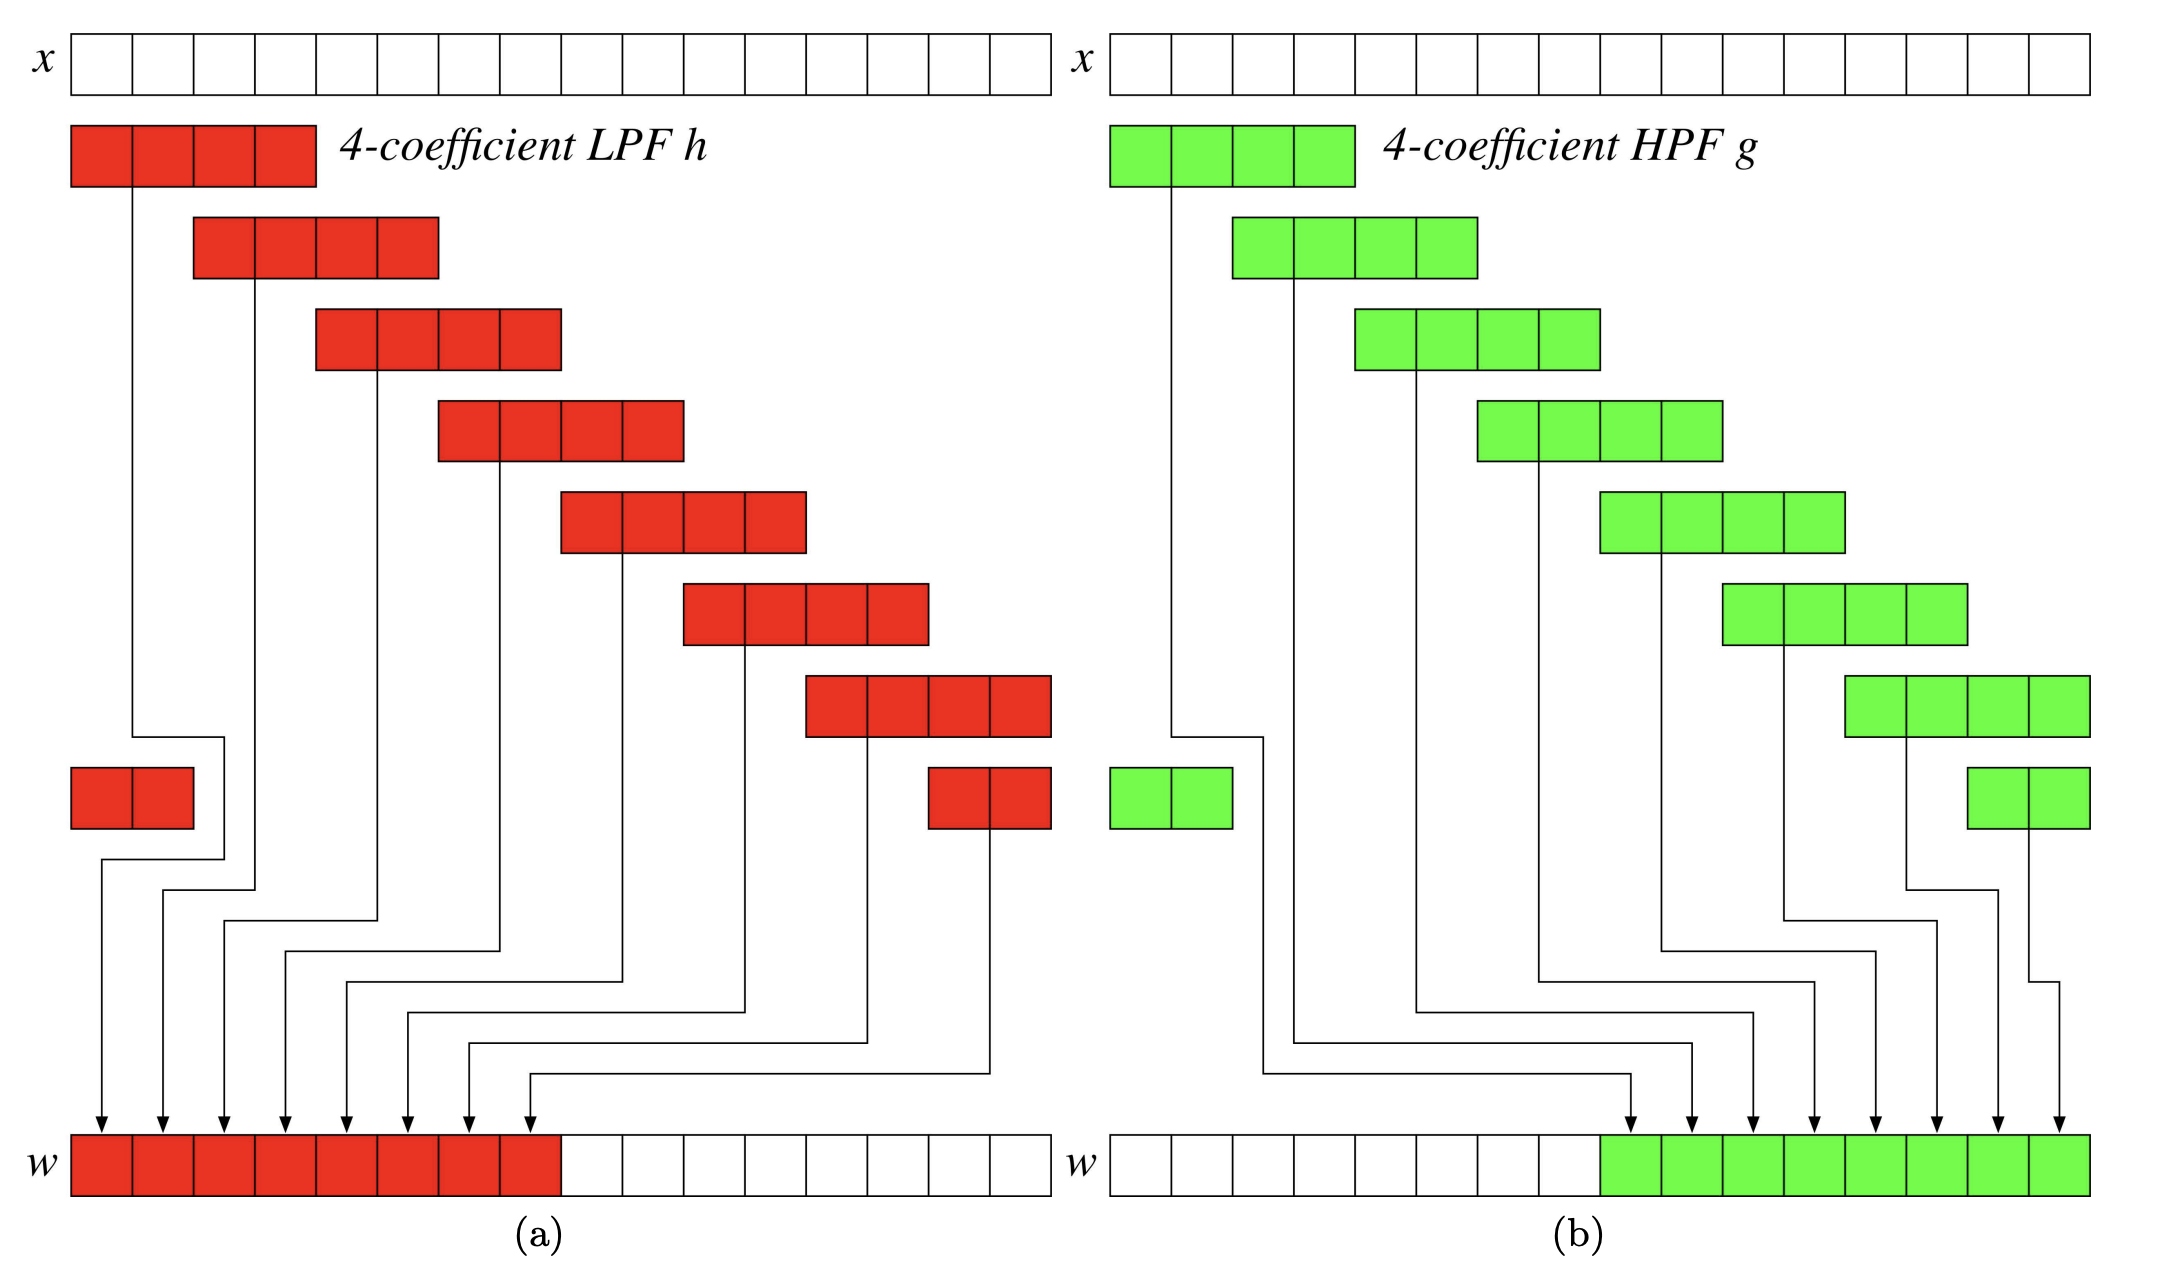

Illustration de la reconstruction

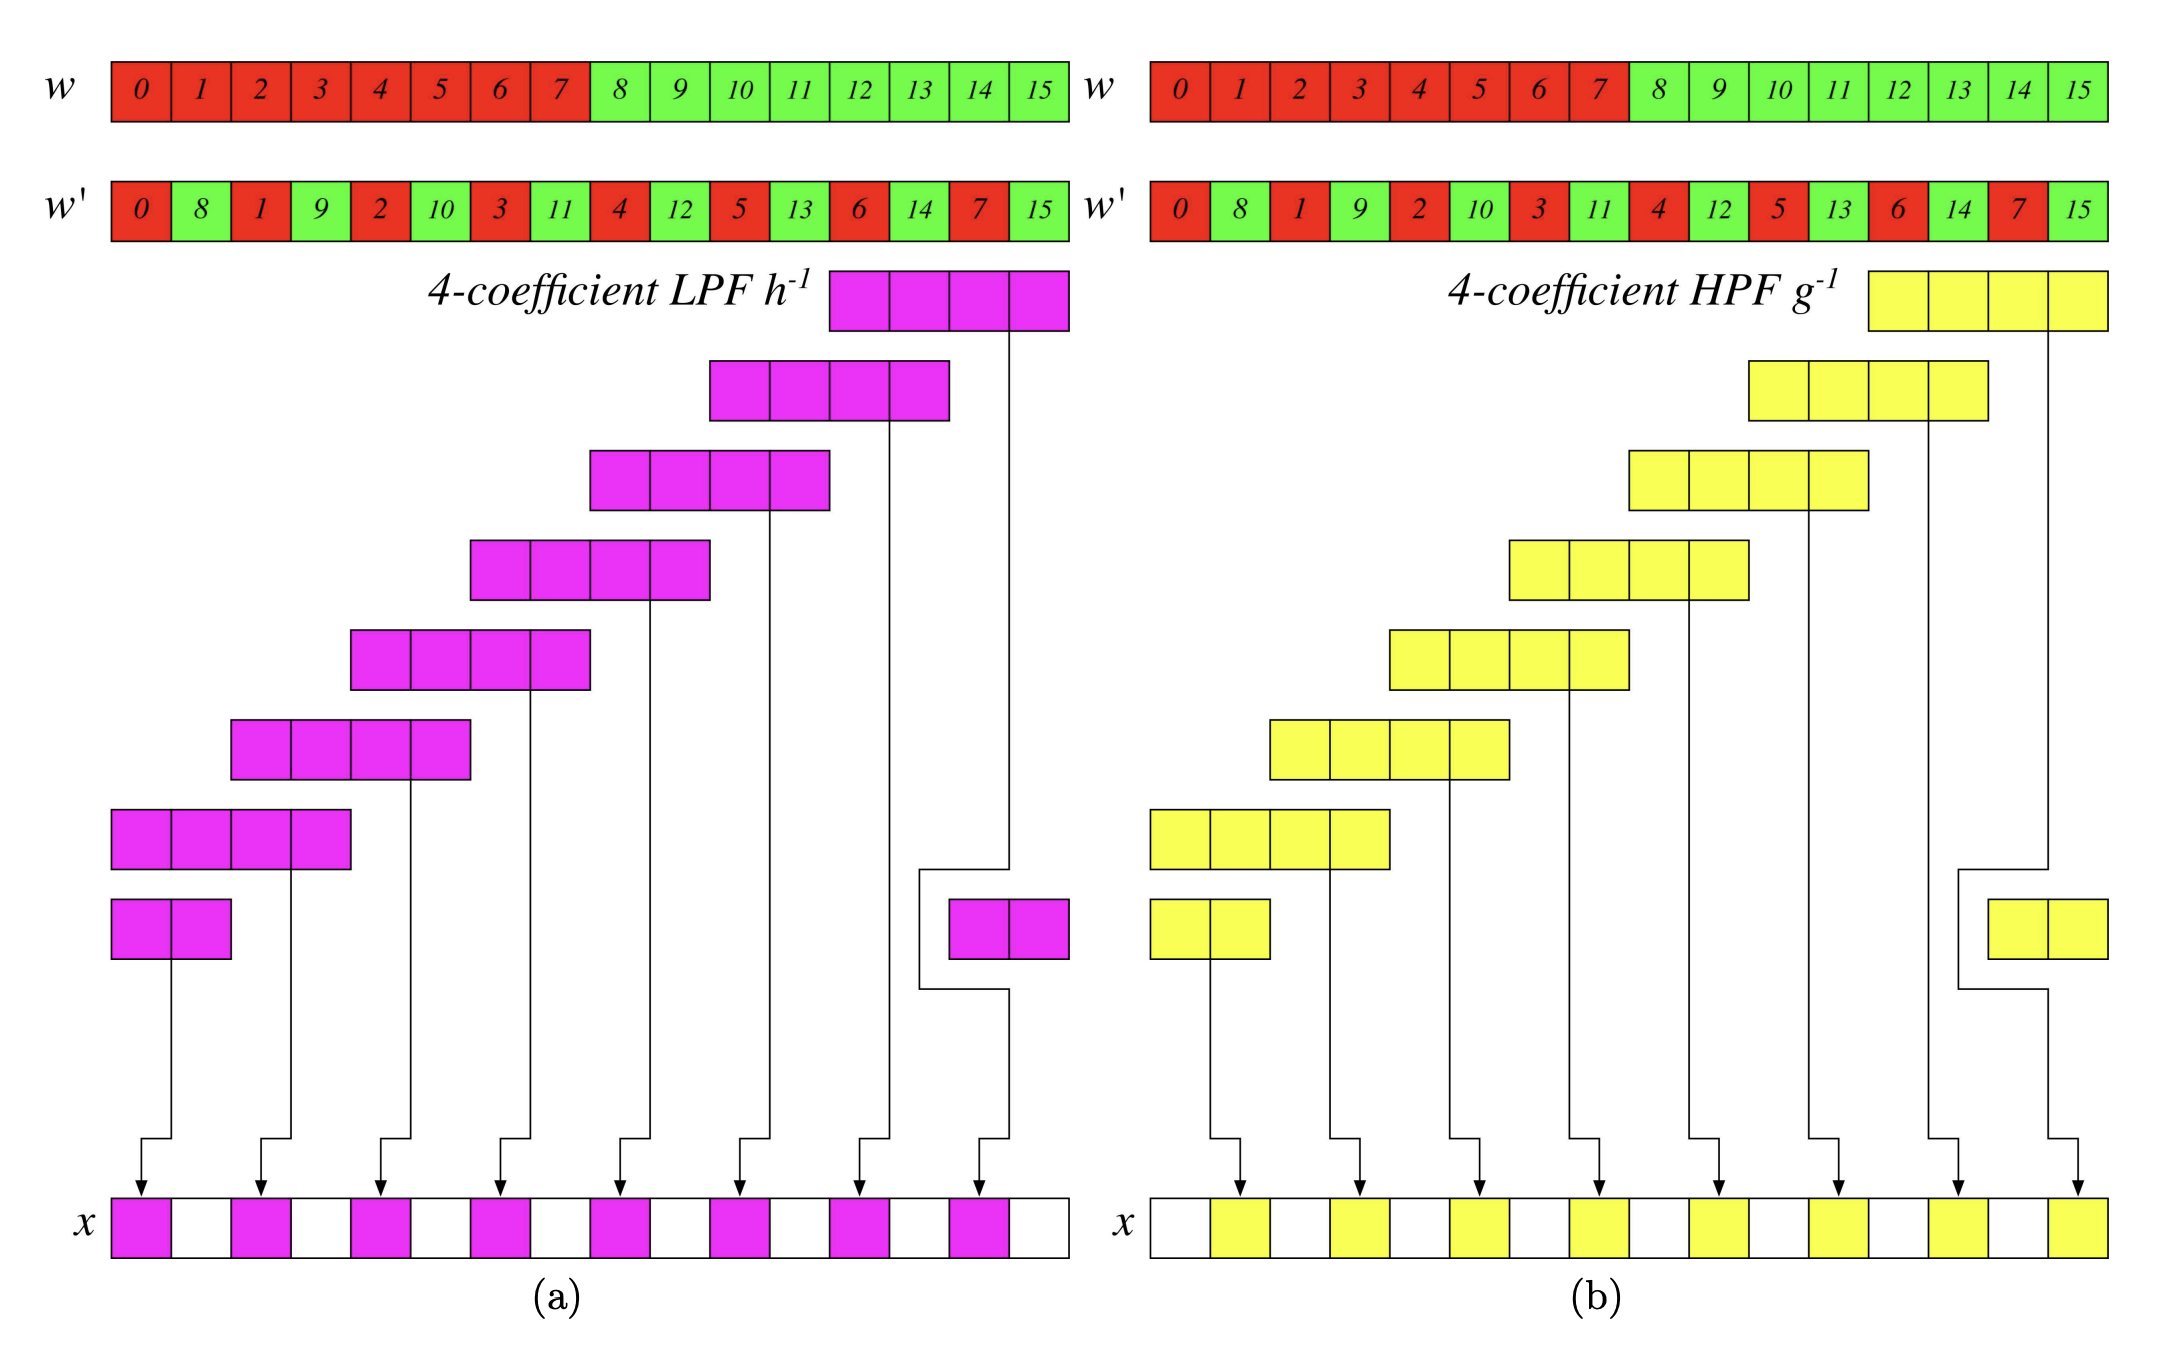

## En 2 D

On utilise le principe de la tensorisation

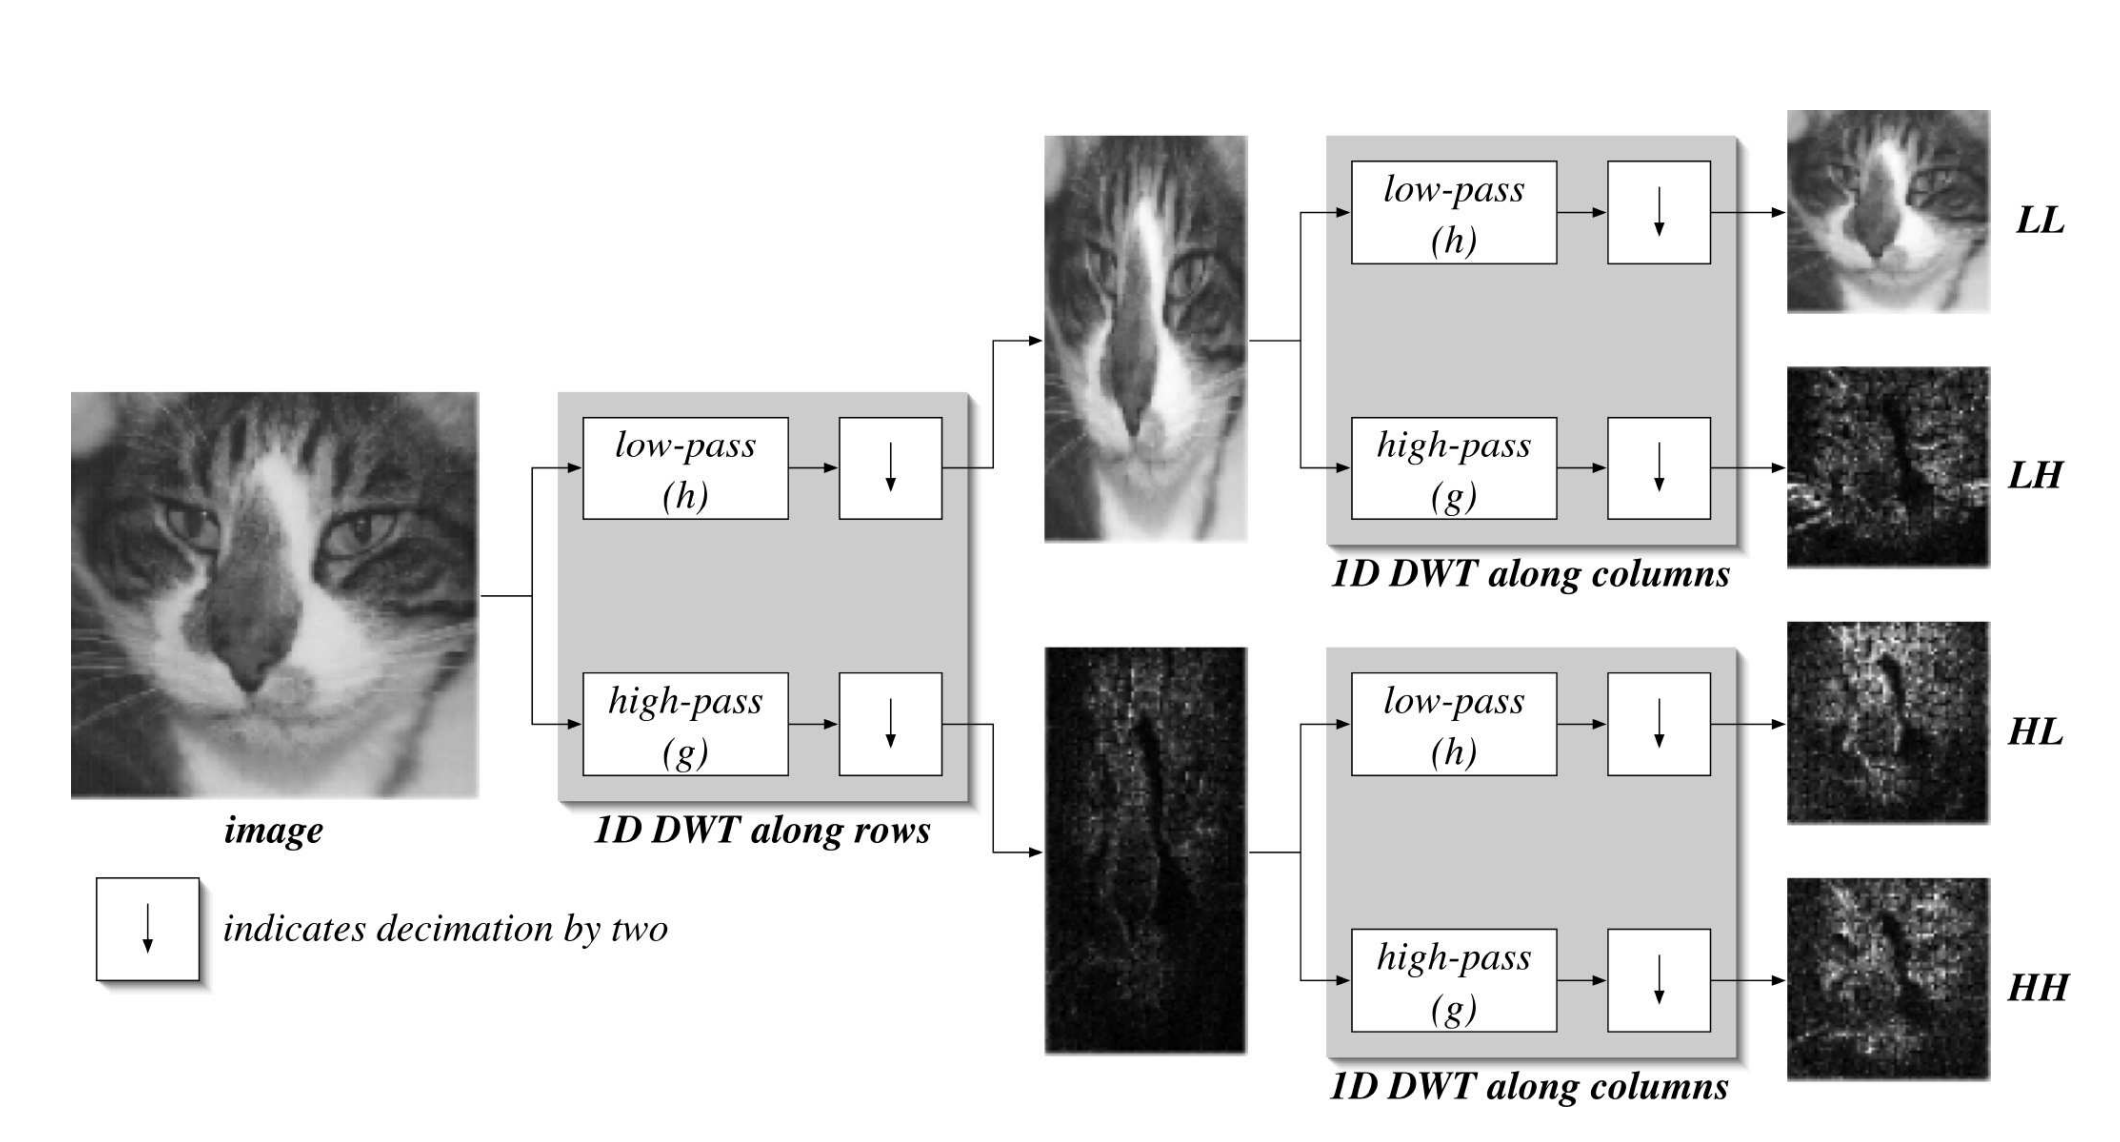